In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

import torch
import torch.nn as nn




In [11]:
def generate_triangle(width, height):
    points = np.array([[random.randint(int(-width * 0.1), int(width * 1.1)), random.randint(int(-height * 0.1), int(height * 1.1))] for _ in range(3)], dtype=np.int32)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return "polygon", (points, color)

def generate_rectangle(width, height):
    points = np.array([[random.randint(int(-width * 0.1), int(width * 1.1)), random.randint(int(-height * 0.1), int(height * 1.1))] for _ in range(4)], dtype=np.int32)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return "polygon", (points, color)

def generate_ellipse(width, height):
    center = (random.randint(int(-width * 0.1), int(width * 1.1)), random.randint(int(-height * 0.1), int(height * 1.1)))
    axes = (random.randint(50, width//2), random.randint(50, height//2))
    angle = random.randint(0, 360)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return "ellipse", (center, axes, angle, color)

def generate_star(width, height):
    center = (random.randint(0, width), random.randint(0, height))
    points = np.array([[random.randint(int(-width * 0.1), int(width * 1.1)), random.randint(int(-height * 0.1), int(height * 1.1))] for _ in range(random.choice([4, 5]))], dtype=np.int32)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return "star", (center, points, color)

def generate_image(width, height, num_triangles, num_rectangles, num_ellipses, num_stars):
    bg_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    img = np.full((height, width, 3), bg_color, dtype=np.uint8)

    shapes = []

    for _ in range(num_triangles):
        shapes.append(generate_triangle(width, height))
    for _ in range(num_rectangles):
        shapes.append(generate_rectangle(width, height))
    for _ in range(num_ellipses):
        shapes.append(generate_ellipse(width, height))
    for _ in range(num_stars):
        shapes.append(generate_star(width, height))

    random.shuffle(shapes)

    for shape_type, params in shapes:
        if shape_type == "polygon":
            points, color = params
            cv2.fillPoly(img, [points], color)
        elif shape_type == "ellipse":
            center, axes, angle, color = params
            cv2.ellipse(img, center, axes, angle, 0, 360, color, -1)
        elif shape_type == "star":
            center, points, color = params
            for point in points:
                cv2.line(img, center, tuple(point), color, 1, cv2.LINE_AA)

    return img

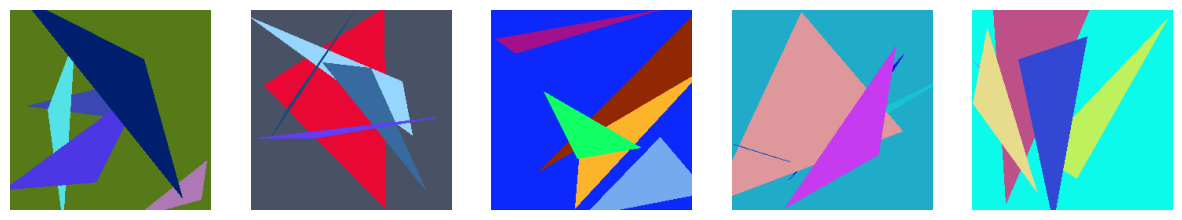

In [12]:
images = [generate_image(256, 256, 5, 0, 0, 0) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

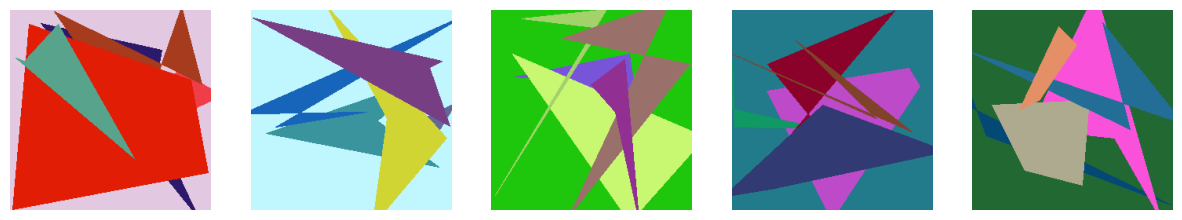

In [13]:
images = [generate_image(256, 256, 0, 5, 0, 0) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

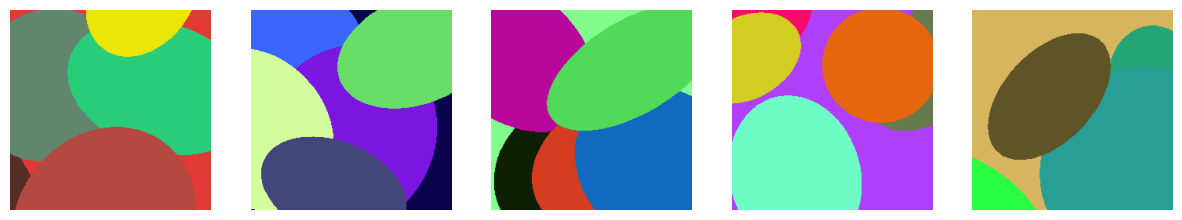

In [14]:
images = [generate_image(256, 256, 0, 0, 5, 0) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

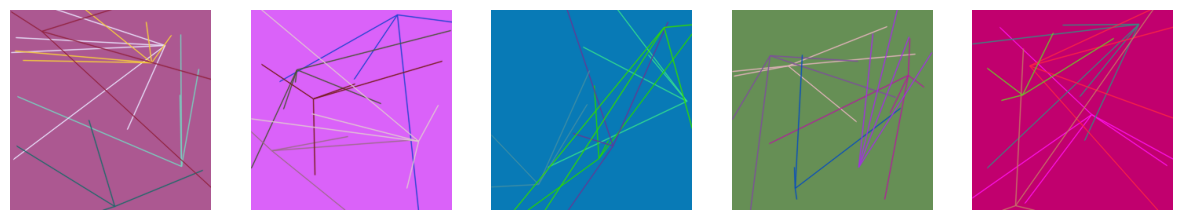

In [15]:
images = [generate_image(256, 256, 0, 0, 0, 5) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

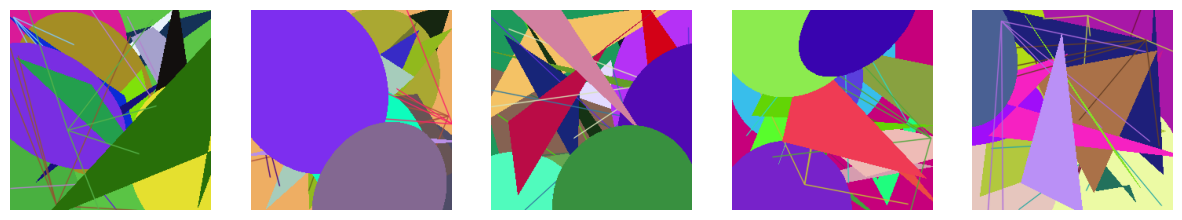

In [16]:
images = [generate_image(256, 256, 5, 5, 5, 5) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

In [17]:
def noise_add(image, sigma=None):
    if sigma is None:
        sigma = random.uniform(0.1, 0.3)
    noisy = image.astype(np.float32) + np.random.normal(0, sigma * 255, image.shape)
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def noise_mul(image, sigma=None):
    if sigma is None:
        sigma = random.uniform(0.1, 0.3)
    noisy = image.astype(np.float32) * np.random.normal(1, sigma, image.shape)
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

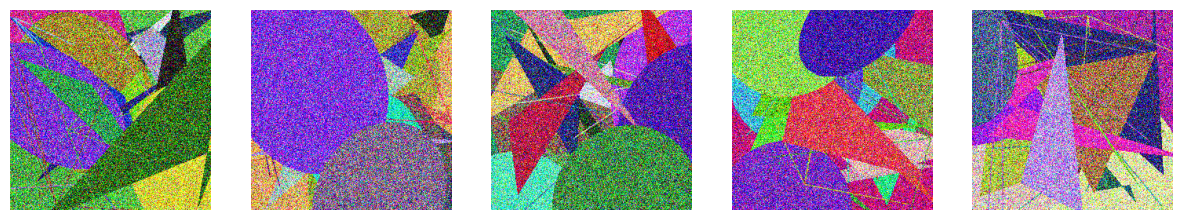

In [18]:
# noisy_images_additive = [noise_add(img, random.uniform(0.1, 0.3)) for img in images]
noisy_images_additive = [noise_add(img, 0.3) for img in images]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(noisy_images_additive[i])
    ax.set_axis_off()

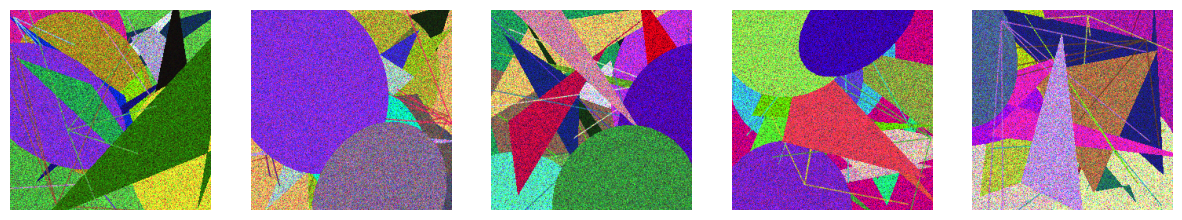

In [19]:
# noisy_images_multiplicative = [noise_mul(img, random.uniform(0.1, 0.3)) for img in images]
noisy_images_multiplicative = [noise_mul(img, 0.3) for img in images]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(noisy_images_multiplicative[i])
    ax.set_axis_off()

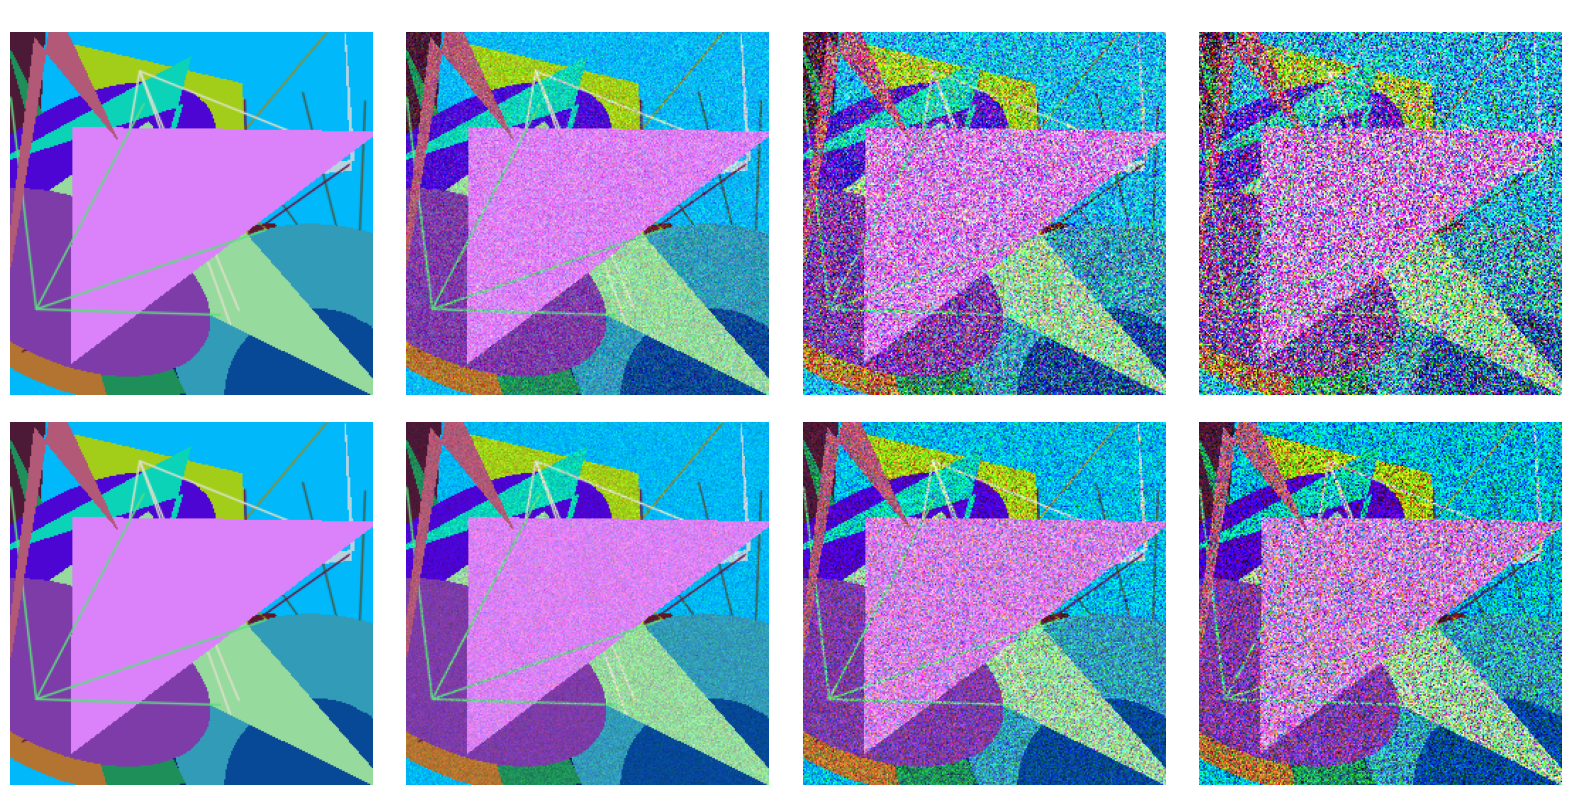

In [20]:
img = generate_image(256, 256, 5, 5, 5, 5)

noise_levels = [0.0, 0.1, 0.3, 0.5]
titles = ['No Noise', 'Noise 0.1', 'Noise 0.3', 'Noise 0.5']

fig, axes = plt.subplots(2, 4, figsize=(16, 8), facecolor='none')
for i, level in enumerate(noise_levels):
    if level == 0.0:
        axes[0, i].imshow(img)
    else:
        noisy = noise_add(img, level)
        axes[0, i].imshow(noisy)
    axes[0, i].set_title(f"Additive: {titles[i]}", color="white")
    axes[0, i].set_axis_off()

for i, level in enumerate(noise_levels):
    if level == 0.0:
        axes[1, i].imshow(img)
    else:
        noisy = noise_mul(img, level)
        axes[1, i].imshow(noisy)
    axes[1, i].set_title(f"Multiplicative: {titles[i]}", color="white")
    axes[1, i].set_axis_off()

plt.tight_layout()
plt.show()

In [21]:
class FilterBranch(nn.Module):
    def __init__(self):
        super(FilterBranch, self).__init__()
        self.R_conv = nn.Conv2d(1, 8, kernel_size=11, padding=5, bias=False)
        self.G_conv = nn.Conv2d(1, 8, kernel_size=11, padding=5, bias=False)
        self.B_conv = nn.Conv2d(1, 8, kernel_size=11, padding=5, bias=False)

    def forward(self, x):
        # x: (B, 3, H, W)
        R = x[:, 0:1, :, :]  # (B, 1, H, W)
        G = x[:, 1:2, :, :]
        B = x[:, 2:3, :, :]

        Rf = self.R_conv(R)  # (B, 8, H, W)
        Gf = self.G_conv(G)
        Bf = self.B_conv(B)

        # Združimo rezultate v (B, 3, 8, H, W)
        filtered = torch.stack([Rf, Gf, Bf], dim=1)
        return filtered  # (B, 3, 8, H, W)


In [22]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels=None, stride=1,
                 dropout_rate=0.1):
        super(ResNetBlock, self).__init__()
        out_channels = out_channels or in_channels  # če ni določeno, ohrani enako št. kanalov

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)

        self.dropout = nn.Dropout2d(p=dropout_rate)
        self.relu = nn.ReLU(inplace=True)

        if in_channels != out_channels or stride != 1:
            self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride)
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        residual = self.shortcut(x)

        out = self.conv1(x)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.dropout(out)
        out += residual

        out = self.relu(out)
        return out


In [23]:
class WeightBranch(nn.Module):
    def __init__(self,):
        super(WeightBranch, self).__init__()

        self.resnet1 = ResNetBlock(3, 32)
        self.resnet2 = ResNetBlock(32, 32)
        self.resnet3 = ResNetBlock(32, 32)

        self.final_conv = nn.Conv2d(32, 8, kernel_size=1)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # x shape: (B, 3, H, W)
        x = self.resnet1(x)
        x = self.resnet2(x)
        x = self.resnet3(x)
        x = self.final_conv(x)     # -> (B, 8, H, W)
        weights = self.softmax(x)  # -> (B, 8, H, W)
        return weights


In [24]:
class EdgePreservingDenoiser(nn.Module):
    def __init__(self):
        super(EdgePreservingDenoiser, self).__init__()
        self.filter_branch = FilterBranch()
        self.weight_branch = WeightBranch()

    def forward(self, x):
        # x shape: (B, 3, H, W)
        filtered = self.filter_branch(x)  # (B, 3, 8, H, W)
        weights = self.weight_branch(x)   # (B, 8, H, W)

        # Združi veje za vsak barvni kanal
        # Razširi weights za 3 kanale: (B, 1, 8, H, W)
        weights = weights.unsqueeze(1)    # (B, 1, 8, H, W)

        # Pomnožimo in seštejemo po 8 filtrih
        output = (filtered * weights).sum(dim=2)  # (B, 3, H, W)
        output = torch.clamp(output, 0.0, 1.0)

        return output

In [25]:
import torchinfo
import torch.optim as optim
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EdgePreservingDenoiser().to(device)

optimizer = optim.AdamW(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

num_epochs = 5           # ali ~100000 korakov za končno treniranje
batch_size = 8
num_samples = 1000       # število sintetičnih vzorcev za trening
noise_level = 0.3        # fiksni ali naključni nivo šuma

model_file_name = "denoiser_additive.pth"
noise_fn = noise_add
# noise_fn = noise_mul

print(torchinfo.summary(model, [1, 3, 256, 256]))


Layer (type:depth-idx)                   Output Shape              Param #
EdgePreservingDenoiser                   [1, 3, 256, 256]          --
├─FilterBranch: 1-1                      [1, 3, 8, 256, 256]       --
│    └─Conv2d: 2-1                       [1, 8, 256, 256]          968
│    └─Conv2d: 2-2                       [1, 8, 256, 256]          968
│    └─Conv2d: 2-3                       [1, 8, 256, 256]          968
├─WeightBranch: 1-2                      [1, 8, 256, 256]          --
│    └─ResNetBlock: 2-4                  [1, 32, 256, 256]         --
│    │    └─Conv2d: 3-1                  [1, 32, 256, 256]         128
│    │    └─Conv2d: 3-2                  [1, 32, 256, 256]         896
│    │    └─Dropout2d: 3-3               [1, 32, 256, 256]         --
│    │    └─ReLU: 3-4                    [1, 32, 256, 256]         --
│    │    └─Conv2d: 3-5                  [1, 32, 256, 256]         9,248
│    │    └─Dropout2d: 3-6               [1, 32, 256, 256]         --
│    │ 

In [30]:
def nn_train(model, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0

        for _ in tqdm(range(num_samples // batch_size), desc=f"Epoch {epoch+1}/{num_epochs}"):
            clean_batch = []
            noisy_batch = []

            for _ in range(batch_size):
                img = generate_image(256, 256, 5, 5, 5, 5)
                noisy = noise_fn(img, np.random.uniform(0.1, 0.3))

                clean_batch.append(torch.tensor(img.transpose(2,0,1), dtype=torch.float32))
                noisy_batch.append(torch.tensor(noisy.transpose(2,0,1), dtype=torch.float32))

            clean_batch = torch.stack(clean_batch).to(device)
            noisy_batch = torch.stack(noisy_batch).to(device)

            optimizer.zero_grad()
            output = model(noisy_batch)
            loss = criterion(output, clean_batch)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch {epoch+1} - Avg loss: {epoch_loss / (num_samples // batch_size):.6f}")

    torch.save(model.state_dict(), model_file_name)
    print("✅ Model shranjen.")

# nn_train(model, num_epochs)

In [27]:
def psnr_torch(img, recon, max_val=1.0):
    # img, recon: torch tensors, shape (C,H,W) ali (1,C,H,W)
    mse = torch.mean((img - recon) ** 2)
    if mse == 0:
        return torch.tensor(100.0)
    return 20.0 * torch.log10(torch.tensor(max_val)) - 10.0 * torch.log10(mse)

def snr_torch(clean, recon):
    # signal power over reconstruction error power
    signal_power = torch.mean(clean ** 2)
    noise_power = torch.mean((clean - recon) ** 2)
    if noise_power == 0:
        return torch.tensor(100.0)
    return 10.0 * torch.log10(signal_power / noise_power)

# ---------- testna funkcija za eno sliko ----------
def nn_test_single(model, img_np, noise_fn, noise_level):
    model.eval()
    noisy_np = noise_fn(img_np, noise_level)

    # convert to tensor (C,H,W) and batch
    clean_t = torch.tensor(img_np.transpose(2,0,1), dtype=torch.float32).unsqueeze(0).to(device)
    noisy_t = torch.tensor(noisy_np.transpose(2,0,1), dtype=torch.float32).unsqueeze(0).to(device)

    with torch.no_grad():
        out_t = model(noisy_t).clamp(0.0, 1.0)

    # metrics (use tensors moved to cpu)
    clean_t_cpu = clean_t.cpu().squeeze(0)
    noisy_t_cpu = noisy_t.cpu().squeeze(0)
    out_t_cpu = out_t.cpu().squeeze(0)

    psnr_noisy = psnr_torch(clean_t_cpu, noisy_t_cpu).item()
    snr_noisy = snr_torch(clean_t_cpu, noisy_t_cpu).item()

    psnr_denoised = psnr_torch(clean_t_cpu, out_t_cpu).item()
    snr_denoised = snr_torch(clean_t_cpu, out_t_cpu).item()

    metrics = {
        "psnr_noisy": psnr_noisy,
        "snr_noisy": snr_noisy,
        "psnr_denoised": psnr_denoised,
        "snr_denoised": snr_denoised
    }

    # convert outputs back to HxWxC numpy for plotting
    out_np = out_t_cpu.numpy().transpose(1,2,0)
    return img_np, noisy_np, out_np, metrics

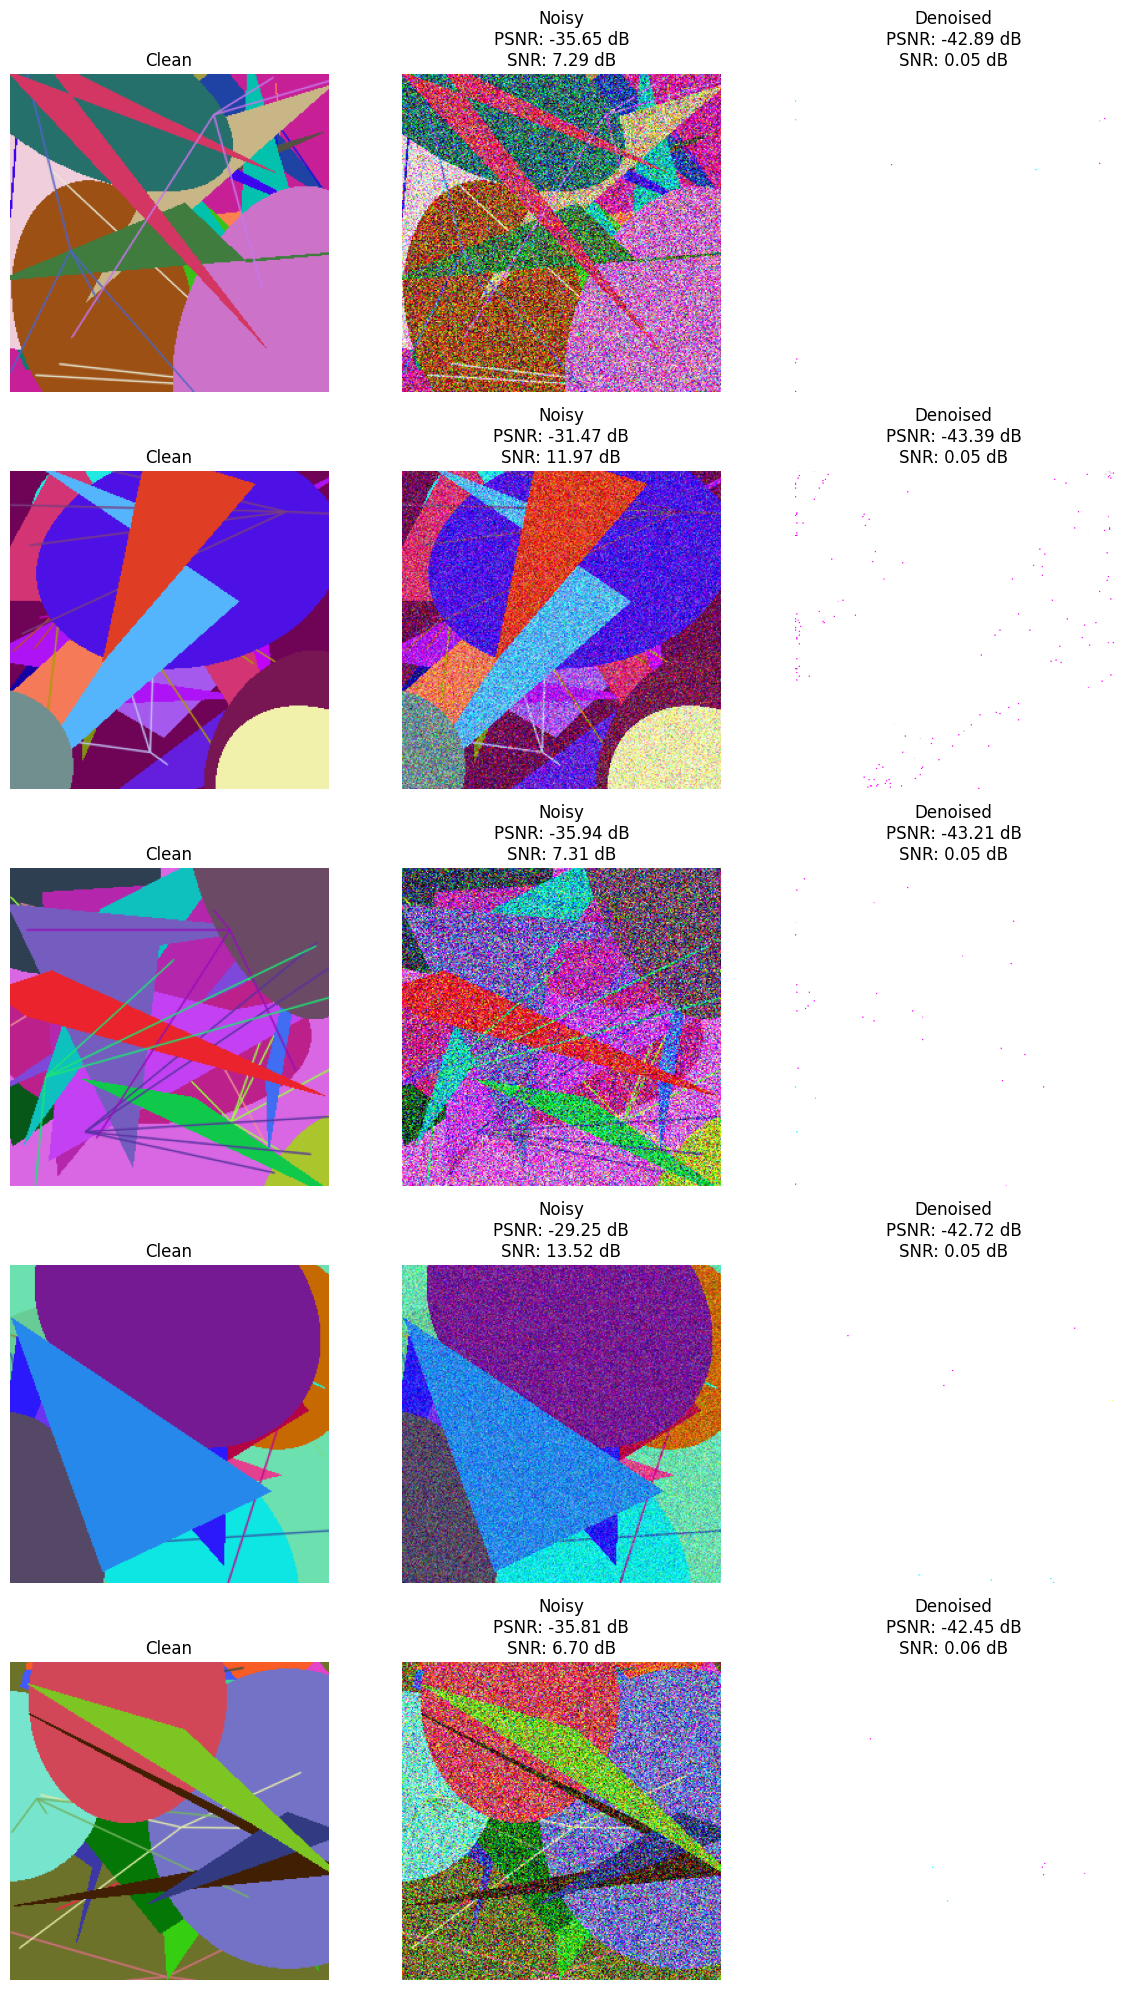

Average PSNR (noisy): -33.62723159790039
Average PSNR (denoised): -42.93257217407226
Average SNR  (noisy): 9.359105396270753
Average SNR  (denoised): 0.05376390963792801


In [28]:
# Testiranje

state = torch.load(model_file_name, map_location=device)
model.load_state_dict(state)
model.to(device)
model.eval()

num_of_tests = 5

fig, axes = plt.subplots(num_of_tests, 3, figsize=(12, 4 * num_of_tests))

psnr_noisy_list = []
psnr_denoised_list = []
snr_noisy_list = []
snr_denoised_list = []

for i in range(num_of_tests):
    img = generate_image(256, 256, 5, 5, 5, 5)  # numpy HxWxC in [0,1]
    clean, noisy, denoised, metrics = nn_test_single(model, img, noise_fn, np.random.uniform(0.1, 0.3))

    psnr_noisy_list.append(metrics["psnr_noisy"])
    psnr_denoised_list.append(metrics["psnr_denoised"])
    snr_noisy_list.append(metrics["snr_noisy"])
    snr_denoised_list.append(metrics["snr_denoised"])

    # plot
    ax0 = axes[i, 0]; ax1 = axes[i, 1]; ax2 = axes[i, 2]
    ax0.imshow(clean); ax0.set_title("Clean"); ax0.axis("off")
    ax1.imshow(noisy); ax1.set_title(f"Noisy\nPSNR: {metrics['psnr_noisy']:.2f} dB\nSNR: {metrics['snr_noisy']:.2f} dB"); ax1.axis("off")
    ax2.imshow(denoised); ax2.set_title(f"Denoised\nPSNR: {metrics['psnr_denoised']:.2f} dB\nSNR: {metrics['snr_denoised']:.2f} dB"); ax2.axis("off")

plt.tight_layout()
plt.show()

print("Average PSNR (noisy):", np.mean(psnr_noisy_list))
print("Average PSNR (denoised):", np.mean(psnr_denoised_list))
print("Average SNR  (noisy):", np.mean(snr_noisy_list))
print("Average SNR  (denoised):", np.mean(snr_denoised_list))

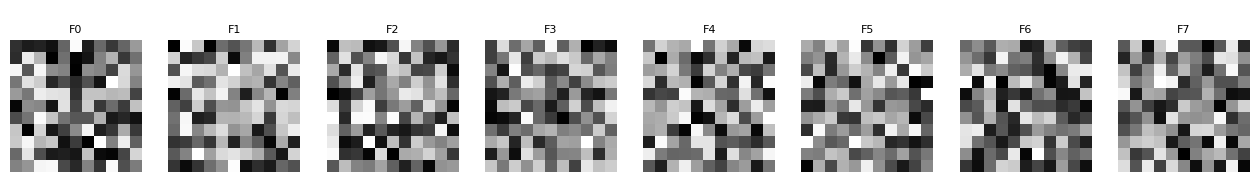

torch.Size([8, 11, 11])


In [32]:
import matplotlib.pyplot as plt

def get_channel_filters(model, channel: str = 'R', show: bool = True):
    # Izberi ustrezno konvolucijsko plast
    fb = model.filter_branch
    if channel == 'R':
        conv = fb.R_conv
    elif channel == 'G':
        conv = fb.G_conv
    elif channel == 'B':
        conv = fb.B_conv
    else:
        raise ValueError("channel mora biti eden izmed: 'R', 'G', 'B'")

    # Pridobi uteži
    weights = conv.weight.data.cpu().squeeze(1)  # (8, 11, 11)

    if show:
        n_filters = weights.shape[0]
        n_cols = min(8, n_filters)
        n_rows = (n_filters + n_cols - 1) // n_cols

        plt.figure(figsize=(n_cols * 2, n_rows * 2))
        for i in range(n_filters):
            plt.subplot(n_rows, n_cols, i + 1)
            plt.imshow(weights[i], cmap='gray')
            plt.axis('off')
            plt.title(f'F{i}', fontsize=8)
        plt.suptitle(f'FilterBranch – kanal {channel}', color='white')
        plt.show()

    return weights

b_filters = get_channel_filters(model, 'B', show=True)
print(b_filters.shape)
